In [17]:
from os.path import dirname, join as pjoin
import numpy
import scipy.io as sio

# from mpl_interactions import ioff, panhandler, zoom_factory
from matplotlib import pyplot as plt
# %matplotlib widget

In [18]:
class ImportMat_Meas():
    mat_fname=''
    Meas_raw=[]
    label_list=[]
    signals={}

    cfg_print_found_signals = True
    cfg_print_rejected_entries = False
    cfg_suppress_rawdata = True
    cfg_hide_exceptions = False

    def __init__(self, meas_path='D:/Git/_Temp/Meas/2012_10_18_Messphase1/2012_10_18',meas_file='VarDrehzahl_80bar_1500rpm_1ms_4InJ.mat'):
        self.mat_fname = pjoin(meas_path, meas_file)
        mat_contents = sio.loadmat(self.mat_fname)
        self.Meas_raw = mat_contents["Messwerte"][0][0]
    
    def find_all_signals(self):
        for id in range(len(self.Meas_raw)):
            A = self.Meas_raw[id]
            self.check_signal(A,id)   

    def log_extract(self,msg,data):
        if self.cfg_print_rejected_entries:
            if self.cfg_suppress_rawdata:
                data = ""
            print(f"{msg} --> skip following entry:\n {data} \n------------\n")
            return
    def plot_signal_list(self):
        cnt = 1
        for key, sig in self.signals.items():
            # print(f"{cnt} : {sig['name']} : {sig['unit']} : {sig['dim']}")
            print(f"{cnt} : {'{0: <30}'.format(sig['name'])} : {sig['unit']} : {sig['dim']}")
            
            cnt= cnt+1
    def check_signal(self,A,id):
        if A.ndim==1:        
            if A.shape == (0,): # ignore empty elements
                # self.log_extract(f"id = {id} :: empty-element -> A.ndim==1--> shape={A.shape}",A)
                return
            elif A.shape == (1,): # single cell
                # self.log_extract(f"id = {id} :: entry with 1 element -> A.ndim==1--> shape={A.shape}",A)
                return
            else:
                self.log_extract(f"id = {id} :: no signal --> A.ndim==1--> dim={A.shape}",A)
                return
        elif A.ndim==2:
            #if A.shape ==(1,1)
            sig = A[0][0]
        else:
            print(f"id = {id} :: unknown entry --> skip following entry: \n {A} \n------------\n")
            return
            

        if sig.ndim==1:
            if sig[0].ndim == 0:
                # self.log_extract(f"id = {id} :: sig[0].ndim == 0 ",sig) 
                return
            else:
                self.log_extract(f"id = {id} :: sig.ndim == 1 ",sig) 
                

        if len(sig.shape)==0:
            # self.log_extract(f"id = {id} ::unknown entry matrix with 1 element --> len(sig.shape)==0 : sig.shape={sig.shape} : type={type(sig)} ",sig)  
            if type(sig) is numpy.void:
                #self.log_extract(f"id = {id} :: type(sig) {type(sig)} : len(sig)={len(sig)}",sig)
                if len(sig)<4:
                    self.log_extract(f"id = {id} :: len(sig) < 4 : type={type(sig)} : len(sig)={len(sig)}",sig)
                    return
            
        if sig.ndim==1:
            log_extract(f"XXXid = {id} :: unknown entry --> sig.ndim==1 , len(sig)={len(sig)}",sig)  
            return
        # if sig.shape[0]<4:
        #     # self.log_extract(f"XXXid = {id} :: unknown signal --> sig.shape[0]<4 --> sig.shape={sig.shape} ",sig)  
        #     return

        #check signal is of valid class
        if not(isinstance(sig,numpy.void)):        
            if isinstance(sig,numpy.float64) or isinstance(sig,numpy.uint8):
                #self.log_extract(f"id = {id} :: sig is only scalar value  [not numpy.void] -->  type(sig) = {type(sig)}",sig)  
                return
            else:
                self.log_extract(f"id = {id} :: no valid signal as type(sig)!=numpy.void -->  type(sig) = {type(sig)}",sig)  
                return
        
        try:    
            sig_name=sig[1][0]
            time_name = sig[2][0]
            unit = sig[3][0]
            values = sig[4]
            dim = values.shape

            #values=values.T[0]
            

            if values.shape[0] ==1:
                return

            if self.cfg_print_found_signals:
                print(f"sig_name= {sig_name}: id={id} : {dim} : {unit} : {time_name} : type={type(sig)}\n------------ ")

            sig_def = {"name":sig_name,"unit":unit,"dim":dim,"values":values}
            # print(f"type(sig_def)={type(sig_def)} : type(self.signals)={type(self.signals)} \n sig_def={sig_def}")
            self.signals[sig_name] = sig_def
        except:
            if not self.cfg_hide_exceptions:
                print(f"id = {id} :: EXCEPT !!! --> ndim={sig.ndim} , shape={sig.shape} , type(sig) = {type(sig)} \nsig = {sig}")

       

In [19]:
# define paths and filename of measurement (mat file)
meas_path_main = 'D:/Git/_Temp/Meas'
meas_path_sub = 'Messphase3/Filtered/HDP_EA211_2_VW_indiziert_ES410'
meas_file = 'HDPmap_10kHz_VarTi_140bar_1500rpm.mat'

data_dir = pjoin(meas_path_main, meas_path_sub)
mat_fname = pjoin(data_dir, meas_file)




In [20]:
# create instance of class <ImportMat_Meas>
mat = ImportMat_Meas(data_dir,mat_fname)

# config
mat.cfg_print_found_signals=False
mat.cfg_print_rejected_entries=False
mat.cfg_suppress_rawdata = False
mat.cfg_hide_exceptions = True

# print all valid signals in mat file
mat.find_all_signals()
mat.plot_signal_list()


1 : CR_bLim\CCP:1                  : - : (571, 1)
2 : CR_bVolfInj_FfCtl_SR\CCP:1     : - : (2, 1)
3 : CR_densFuSys\CCP:1             : kg/l : (2853, 1)
4 : CR_facFilMfMes1_C\CCP:1        : � : (2, 1)
5 : CR_facFilMfMes2_C\CCP:1        : � : (2, 1)
6 : CR_facFilMfMes3_C\CCP:1        : � : (2, 1)
7 : CR_facFilMfMes4_C\CCP:1        : � : (2, 1)
8 : CR_facFilMfMes5_C\CCP:1        : � : (2, 1)
9 : CR_nGainIntY_A\CCP:1           : 1/min : (16, 1)
10 : CR_nGainPropY_A\CCP:1          : 1/min : (16, 1)
11 : CR_pBlkMdsFuMdl\CCP:1          : MPa : (571, 1)
12 : CR_pDif\CCP:1                  : MPa : (571, 1)
13 : CR_pMdl\CCP:1                  : MPa : (5703, 1)
14 : CR_pMes\CCP:1                  : MPa : (5703, 1)
15 : CR_pMesCor\CCP:1               : Not specified : (5703, 1)
16 : CR_pRefCtl\CCP:1               : MPa : (5703, 1)
17 : CR_pRefFil\CCP:1               : MPa : (571, 1)
18 : CR_pRefFilCtl\CCP:1            : MPa : (5703, 1)
19 : CR_pRefFilGrd\CCP:1            : MPa/s : (571, 1)
20 : CR

(345000.0, 350000.0)

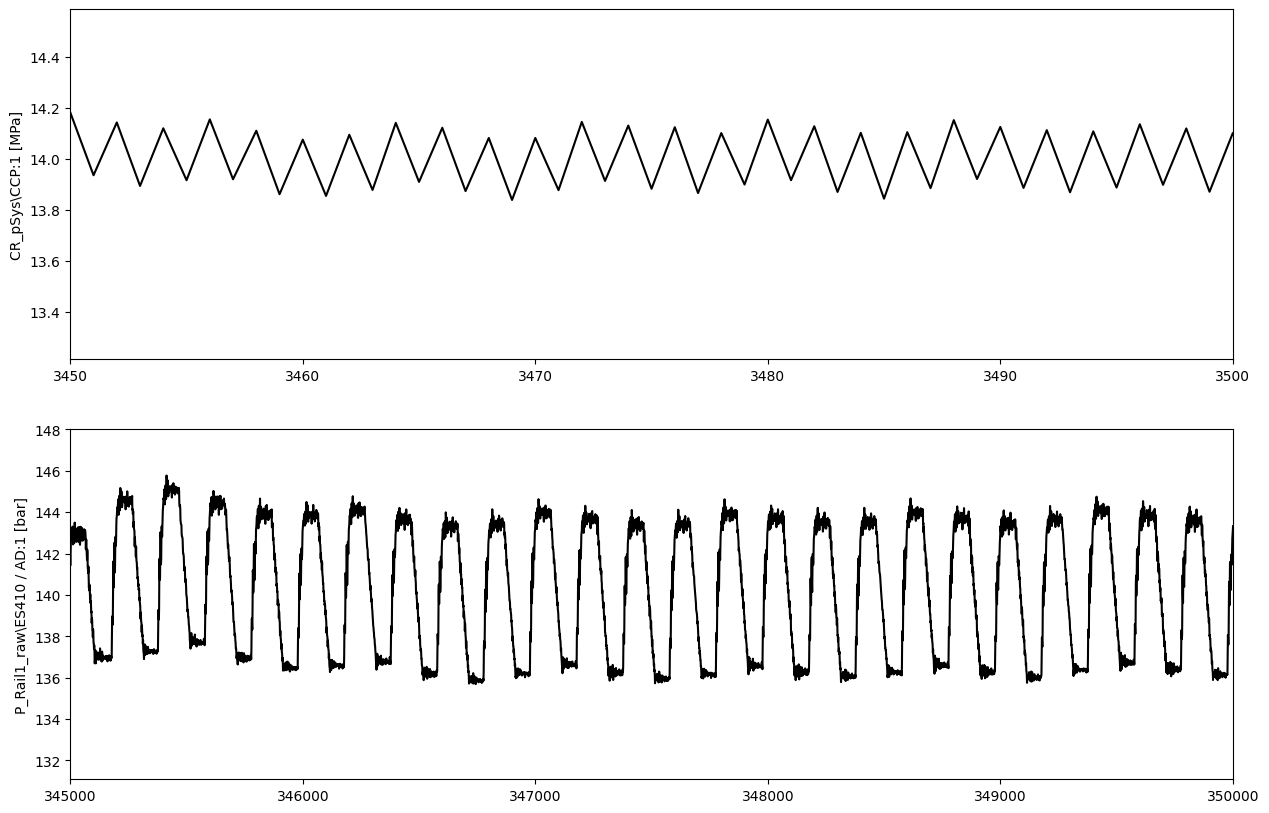

In [28]:
def fig_setup():
    # with plt.ioff():
    fig, axs = plt.subplots(2, 1)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    titles = ["alpha","beta","kappa"]
    # for i in range(1):        
        # ax=axs[i,0]
        # ax.set_title("Varatiation of "+titles[i])
        # ax.set_xlabel("x_1")
        # ax.set_ylabel("x_2")
        # ax.set_xlim([-2, 6])
        # ax.set_ylim([-10, 10])
        # ax.grid()
        
        # ax=axs[i,1]   
        # ax.set_title(f"Propagation: y = f(x)")
        # ax.set_xlabel("y_1")
        # ax.set_ylabel("y_2")
        # ax.set_xlim([-1, 3])
        #ax.set_ylim([-10, 10])
        # ax.grid()
    # axs[0,1].set_ylim([-10, 12])
    return fig,axs

def plot_dist(ax,mat,sig_name):
    if not(sig_name in mat.signals):
        return
    sig = mat.signals[sig_name]
    X=sig["values"].T[0]
    # print(X)
    ax.plot(X, marker='None',linestyle = '-',color='k') 
    ax.set_ylabel(f"{sig['name']} [{sig['unit']}]")
    
fig,axs= fig_setup()
plot_dist(axs[0],mat,"CR_pSys\CCP:1")
axs[0].set_xlim([3450,3500])
plot_dist(axs[1],mat,"P_Rail1_raw\ES410 / AD:1")
axs[1].set_xlim([345000,350000])
# pan_handler = panhandler(fig)
# display(fig.canvas)